### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from mrmr import mrmr_regression



### Data Analysis and Features selection

In [2]:
Train_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-1')
Train_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-2')
Train_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-3')
Train_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-4')
Train_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-5')
Train_6 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-6')
Train_7 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-7')
Train_8 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-8')
Train_9 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-9')
Train_10 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-10')

In [3]:
#concatenate the data

Train = pd.concat([Train_1, Train_2, Train_3, Train_4, Train_5, Train_6, Train_7, Train_8, Train_9, Train_10], ignore_index=True)

In [4]:
Train.describe()

,BIS,x1,x2,x3,x4,x5,x6,x7,x8
count,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000
mean,43.231051,0.780750,0.968675,1.785139,1.789319,0.674981,0.387853,1.014833,1.784883
std,17.007013,0.306070,0.969031,0.003278,0.008828,0.048014,0.009001,0.025047,0.004622
min,15.800000,0.044623,0.190943,1.779489,1.542146,0.534956,0.374412,0.880547,1.765524
25%,32.200000,0.555736,0.401428,1.782285,1.790229,0.638612,0.382479,1.005900,1.781705
50%,40.200000,0.761439,0.556622,1.785139,1.791001,0.677344,0.385339,1.015075,1.785303
75%,49.700000,1.020680,1.214732,1.787983,1.791352,0.714463,0.388813,1.023796,1.788747
max,97.700000,1.954334,6.805957,1.790815,1.791749,0.835586,0.445002,1.138314,1.791757


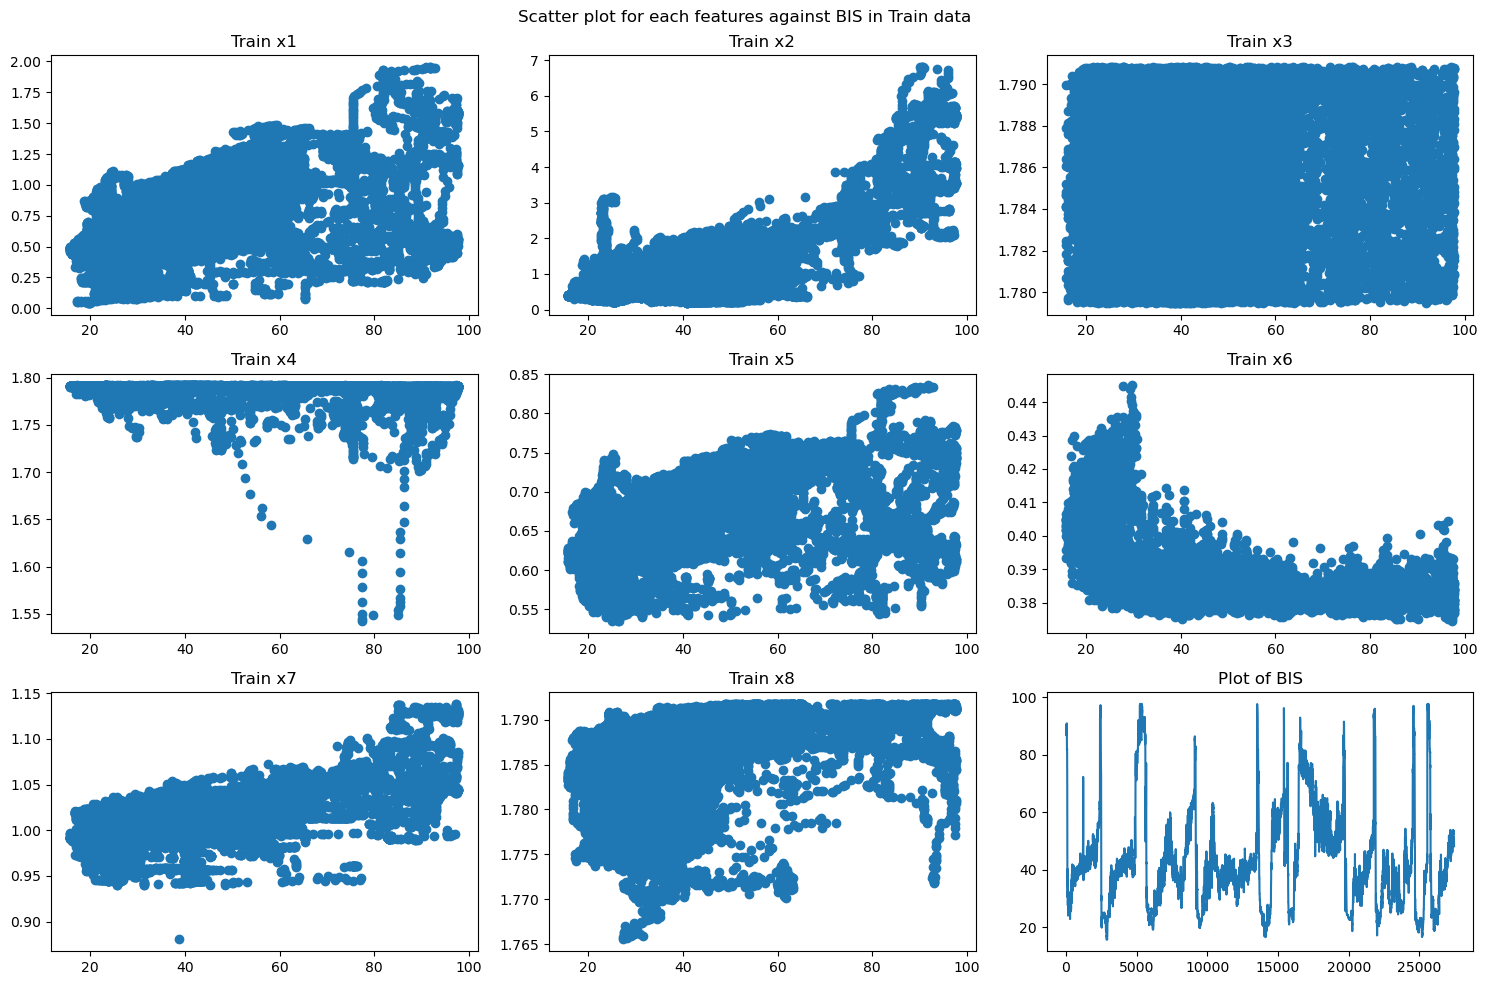

In [5]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(15, 10))

plt.suptitle('Scatter plot for each features against BIS in Train data')

# Plot on the first subplot
axes[0, 0].scatter(Train['BIS'],Train['x1'])
axes[0, 0].set_title('Train x1')

# Plot on the second subplot
axes[0, 1].scatter(Train['BIS'],Train['x2'])
axes[0, 1].set_title('Train x2')

# Plot on the third subplot
axes[0, 2].scatter(Train['BIS'], Train['x3'])
axes[0, 2].set_title('Train x3')

axes[1, 0].scatter(Train['BIS'],Train['x4'])
axes[1, 0].set_title('Train x4')

axes[1, 1].scatter(Train['BIS'], Train['x5'])
axes[1, 1].set_title('Train x5')

axes[1, 2].scatter(Train['BIS'],Train['x6'])
axes[1, 2].set_title('Train x6')

axes[2, 0].scatter(Train['BIS'], Train['x7'])
axes[2, 0].set_title('Train x7')

axes[2, 1].scatter(Train['BIS'], Train['x8'])
axes[2, 1].set_title('Train x8')

axes[2, 2].plot(Train['BIS'])
axes[2, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

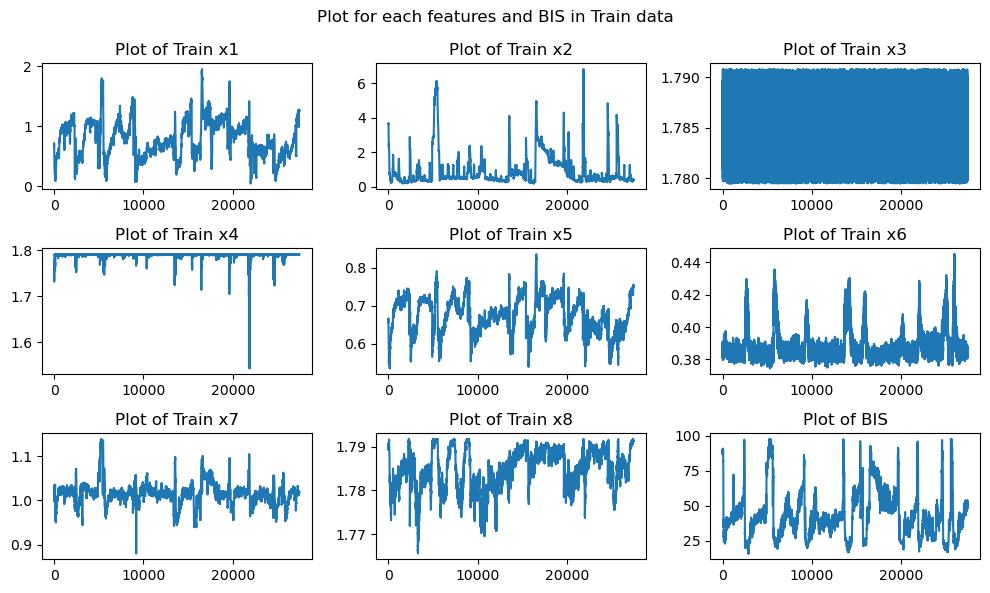

In [6]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(10, 6))

plt.suptitle('Plot for each features and BIS in Train data')


# Plot on the first subplot
axes[0, 0].plot(Train['x1'])
axes[0, 0].set_title('Plot of Train x1')

# Plot on the second subplot
axes[0, 1].plot(Train['x2'])
axes[0, 1].set_title('Plot of Train x2')

# Plot on the third subplot
axes[0, 2].plot(Train['x3'])
axes[0, 2].set_title('Plot of Train x3')

axes[1, 0].plot(Train['x4'])
axes[1, 0].set_title('Plot of Train x4')

axes[1, 1].plot(Train['x5'])
axes[1, 1].set_title('Plot of Train x5')

axes[1, 2].plot(Train['x6'])
axes[1, 2].set_title('Plot of Train x6')

axes[2, 0].plot(Train['x7'])
axes[2, 0].set_title('Plot of Train x7')

axes[2, 1].plot(Train['x8'])
axes[2, 1].set_title('Plot of Train x8')

axes[2, 2].plot(Train['BIS'])
axes[2, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

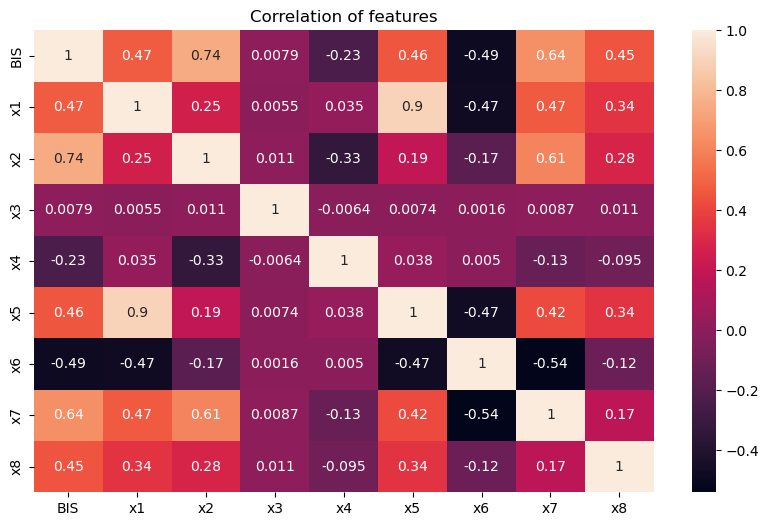

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(Train.corr(), annot = True)
plt.title('Correlation of features')
plt.show()

From the correlation, x2, x7, x6, x1, x5 and x8 seems to be the better features and are listed based on the importance from highest.

In [8]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

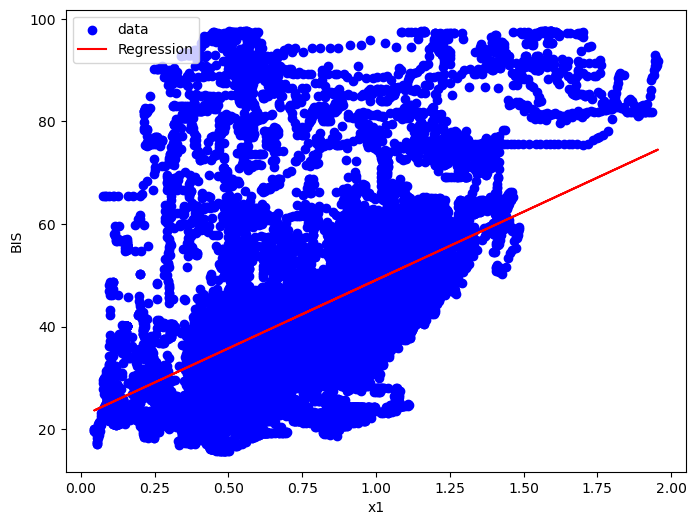

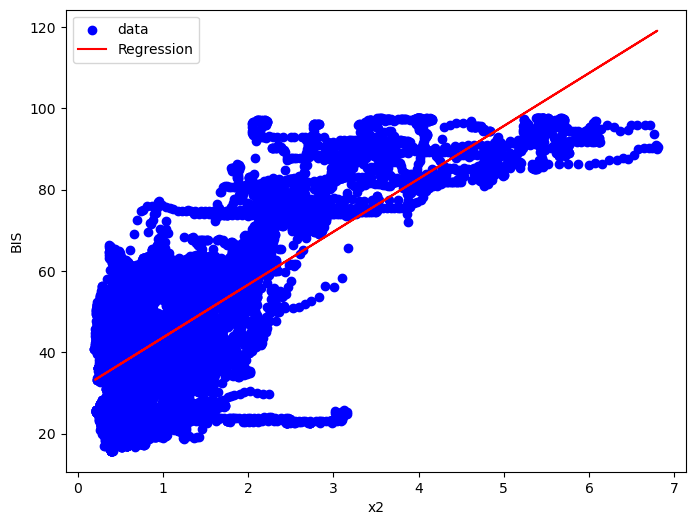

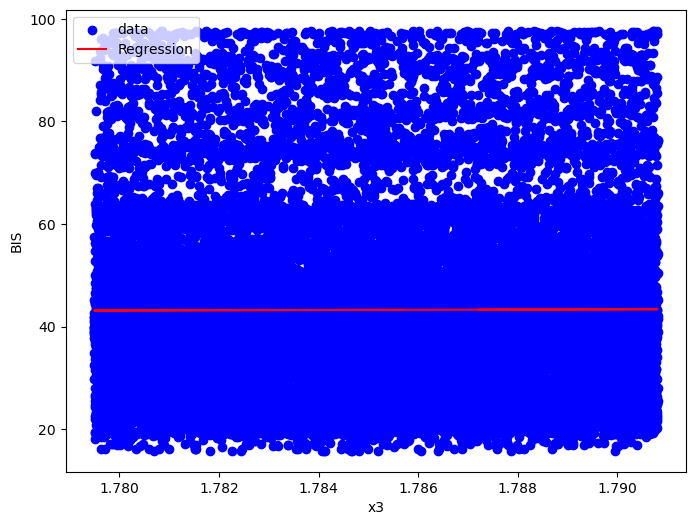

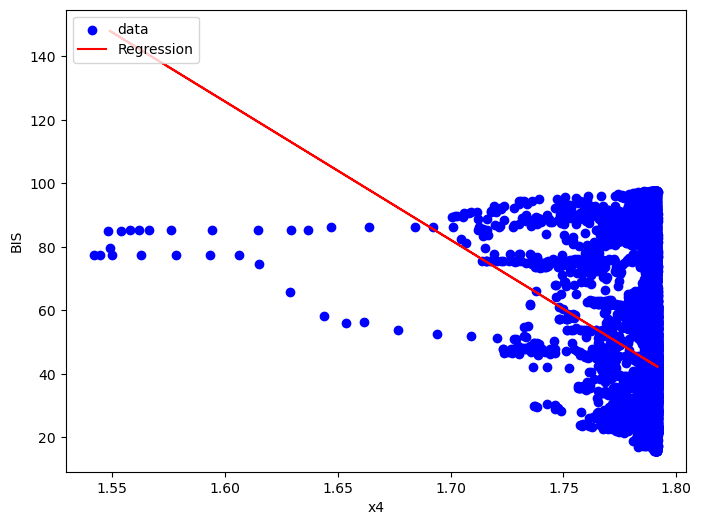

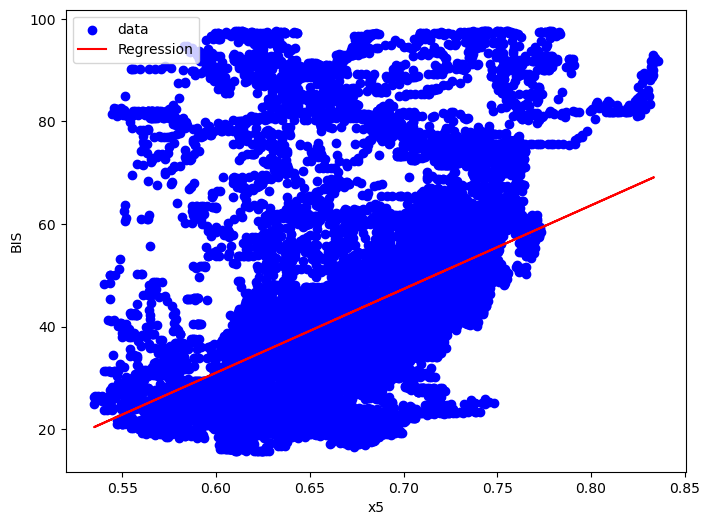

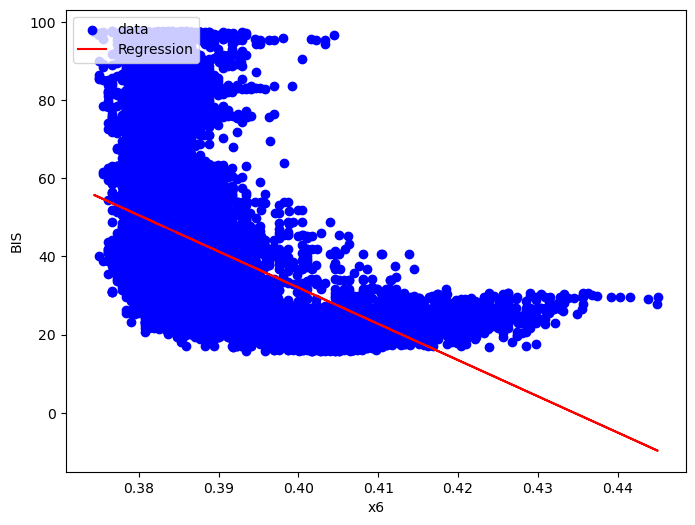

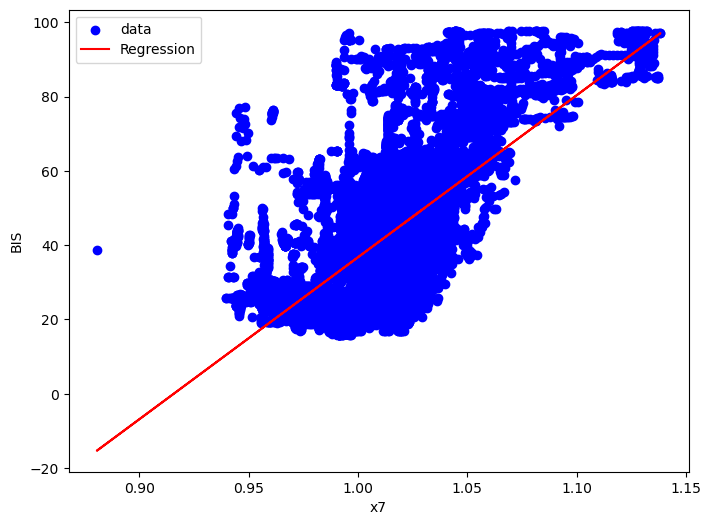

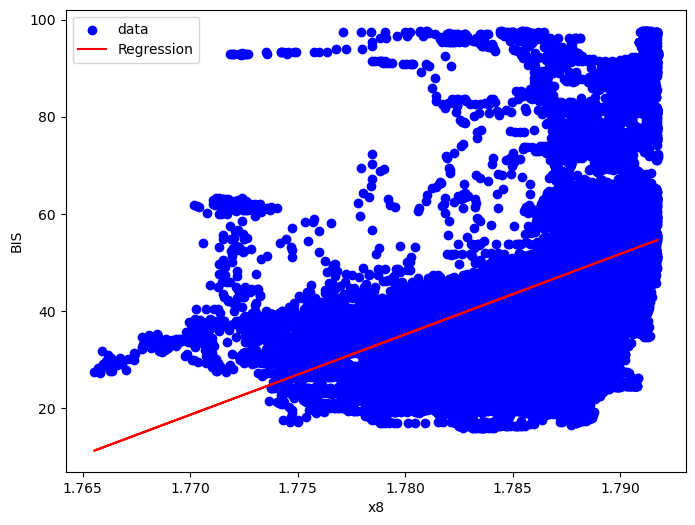

In [9]:

for column in Train.columns:
    if column == "BIS":
        continue
        
    plot_regression(Train, column)
    


In [10]:
# Metrics
pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

,Metrics,Values
0,x1_r2,21.616093
1,x2_r2,55.639711
2,x3_r2,0.007281
3,x4_r2,5.751716
4,x5_r2,20.631576
5,x6_r2,24.102276
6,x7_r2,41.698141
7,x8_r2,20.354571


The Rsquared value showed that x2, x7, x6, x1, x5 and x8 seem to be the better features and are listed in their order of importance from the highest.

Feature 1: 5463.876703
Feature 2: 22435.852205
Feature 3: 0.218814
Feature 4: 976.478501
Feature 5: 4894.421145
Feature 6: 5821.567782
Feature 7: 12918.164146
Feature 8: 4703.868859


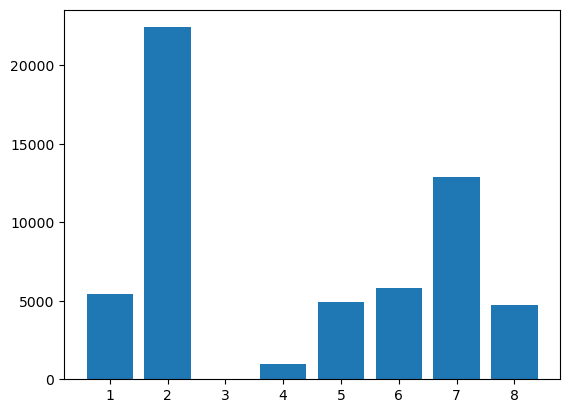

In [11]:
# f-regression feature selection meton
def select_features(X_train, y_train, X_test):
    """
    Function to to train features using f-regression
    
    returned trained input and output data and the features
    """
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X = Train.drop('BIS', axis=1)
y = Train['BIS']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i+1, fs.scores_[i]))
# plot the scores
plt.bar([i+1 for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The f-regression showed that x2, x7, x6, x1, x5 and x8 are the better features.

In [12]:

# select top 8 features using mRMR
from mrmr import mrmr_regression
selected_features = mrmr_regression(X=X, y=y, K=8)

print(selected_features)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.46it/s]

['x2', 'x6', 'x8', 'x7', 'x1', 'x5', 'x4', 'x3']


The mRMR above showed x8, x2, x7, x6, x4 and x5 as the better features.

The first three methods, show the same importance features of x2, x7, x6, x1, x5 and x8.

### Test data

In [13]:
#Import data

Test_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-1')
Test_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-2')
Test_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-3')
Test_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-4')
Test_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-5')

Test = pd.concat([Test_1, Test_2, Test_3, Test_4, Test_5], ignore_index=True)

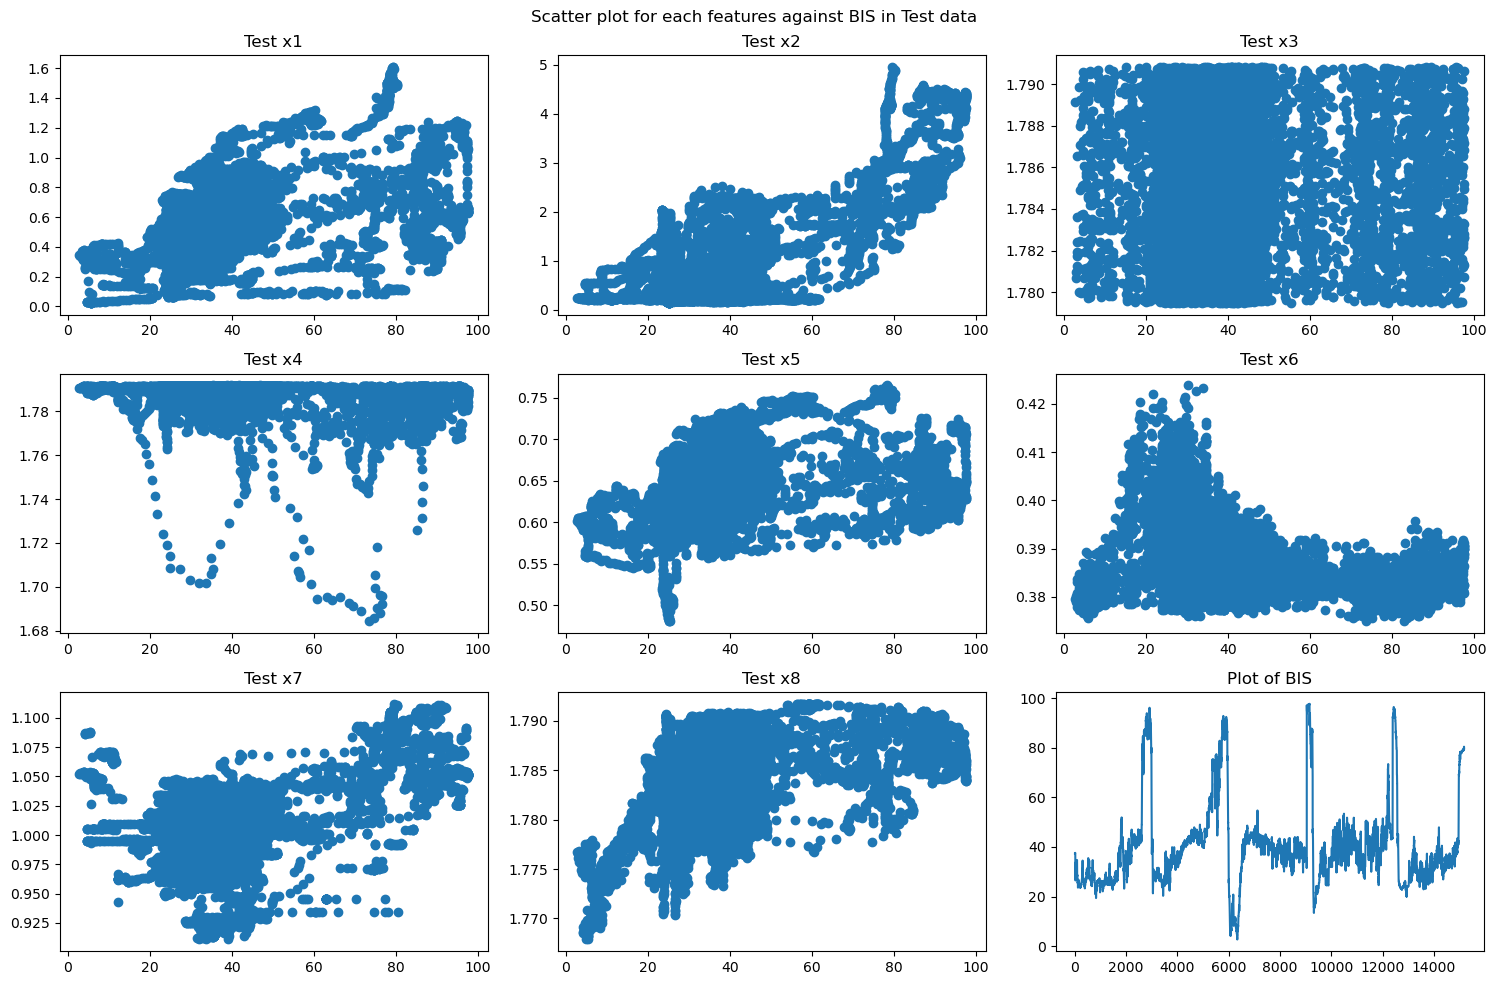

In [14]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(15, 10))

plt.suptitle('Scatter plot for each features against BIS in Test data')

# Plot on the first subplot
axes[0, 0].scatter(Test['BIS'],Test['x1'])
axes[0, 0].set_title('Test x1')

# Plot on the second subplot
axes[0, 1].scatter(Test['BIS'],Test['x2'])
axes[0, 1].set_title('Test x2')

# Plot on the third subplot
axes[0, 2].scatter(Test['BIS'], Test['x3'])
axes[0, 2].set_title('Test x3')

axes[1, 0].scatter(Test['BIS'],Test['x4'])
axes[1, 0].set_title('Test x4')

axes[1, 1].scatter(Test['BIS'], Test['x5'])
axes[1, 1].set_title('Test x5')

axes[1, 2].scatter(Test['BIS'],Test['x6'])
axes[1, 2].set_title('Test x6')

axes[2, 0].scatter(Test['BIS'], Test['x7'])
axes[2, 0].set_title('Test x7')

axes[2, 1].scatter(Test['BIS'], Test['x8'])
axes[2, 1].set_title('Test x8')

axes[2, 2].plot(Test['BIS'])
axes[2, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

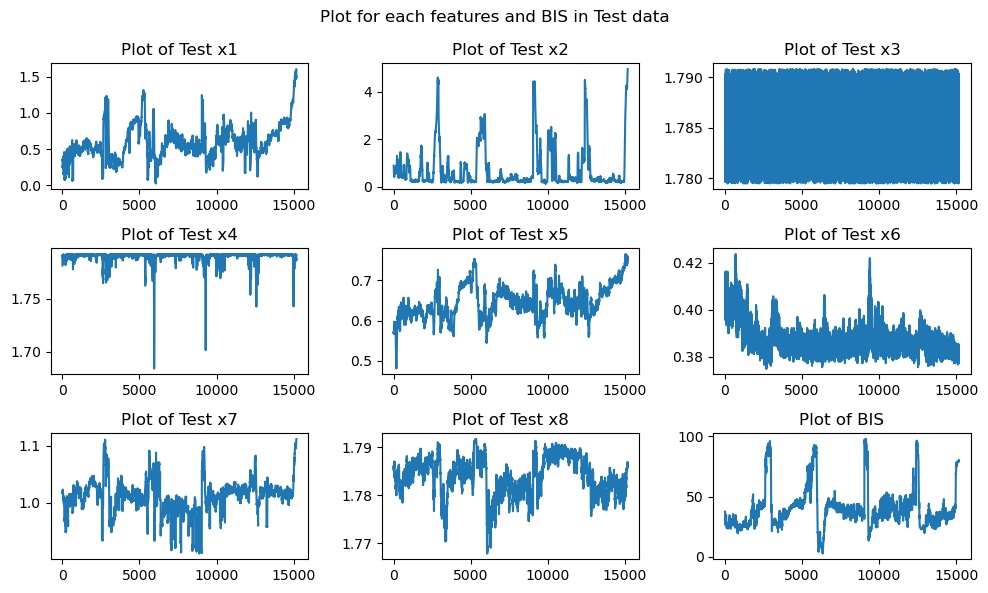

In [15]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(10, 6))

plt.suptitle('Plot for each features and BIS in Test data')

# Plot on the first subplot
axes[0, 0].plot(Test['x1'])
axes[0, 0].set_title('Plot of Test x1')

# Plot on the second subplot
axes[0, 1].plot(Test['x2'])
axes[0, 1].set_title('Plot of Test x2')

# Plot on the third subplot
axes[0, 2].plot(Test['x3'])
axes[0, 2].set_title('Plot of Test x3')

axes[1, 0].plot(Test['x4'])
axes[1, 0].set_title('Plot of Test x4')

axes[1, 1].plot(Test['x5'])
axes[1, 1].set_title('Plot of Test x5')

axes[1, 2].plot(Test['x6'])
axes[1, 2].set_title('Plot of Test x6')

axes[2, 0].plot(Test['x7'])
axes[2, 0].set_title('Plot of Test x7')

axes[2, 1].plot(Test['x8'])
axes[2, 1].set_title('Plot of Test x8')

axes[2, 2].plot(Test['BIS'])
axes[2, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

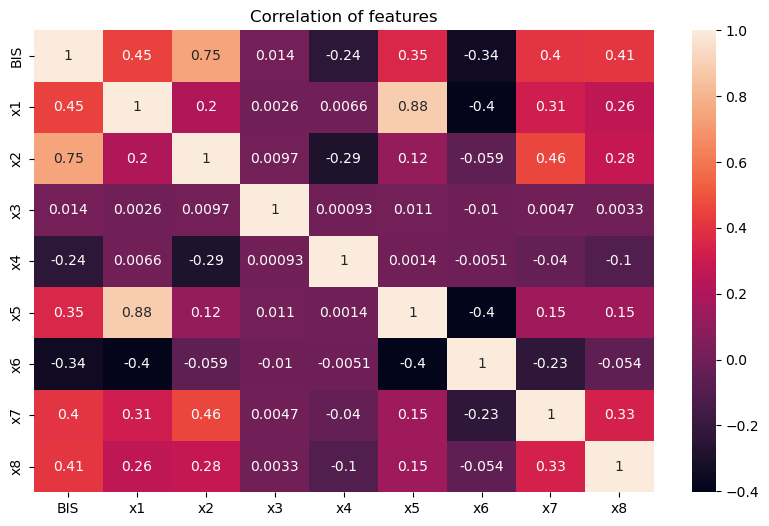

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(Test.corr(), annot = True)
plt.title('Correlation of features')
plt.show()

From the correlation, x2, x1, x8, x7, x5 and x6 seems to be the better features and are listed based on the importance from highest.

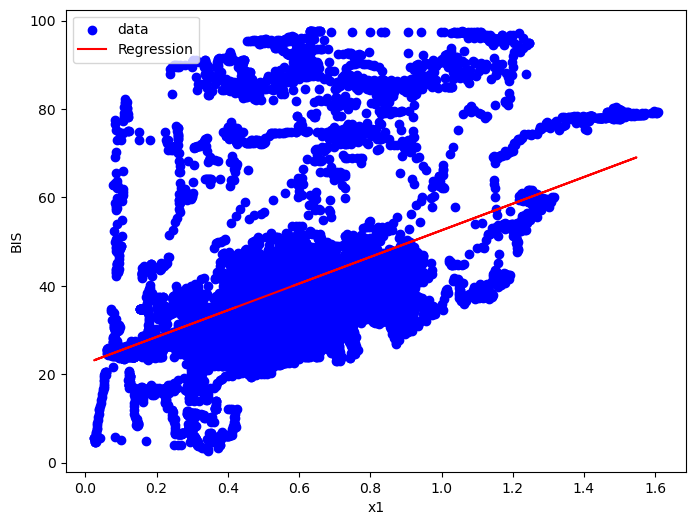

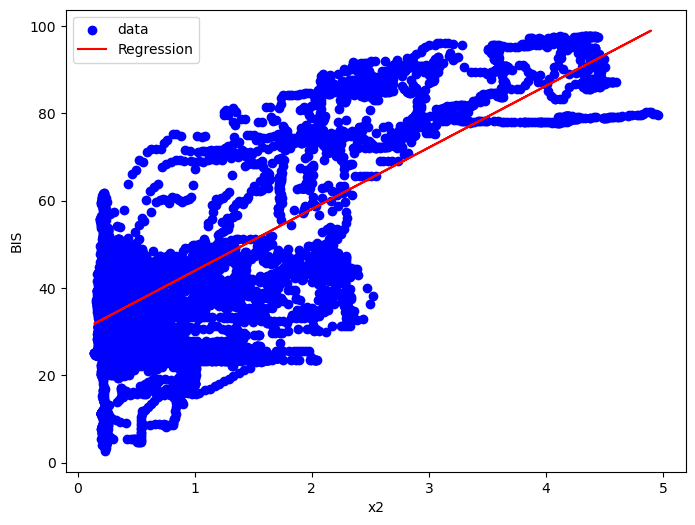

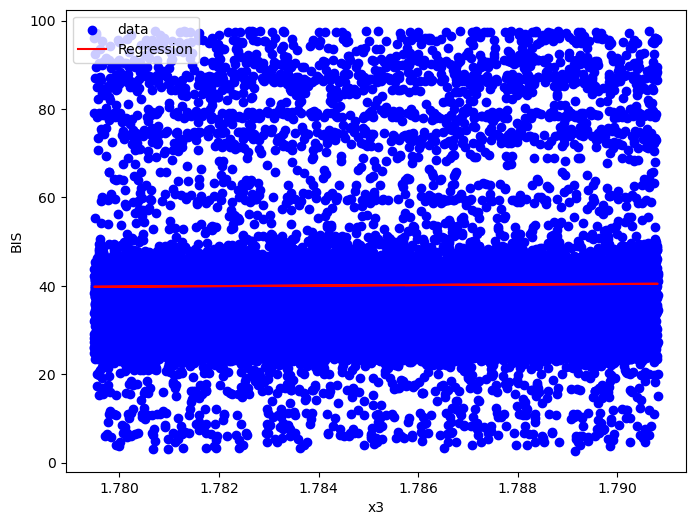

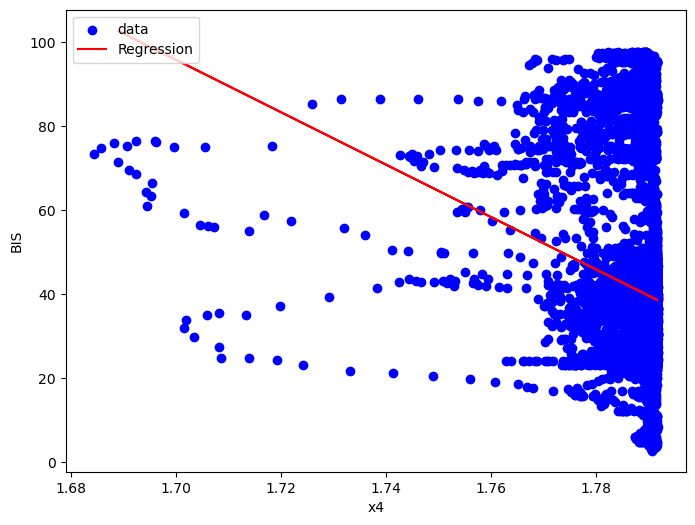

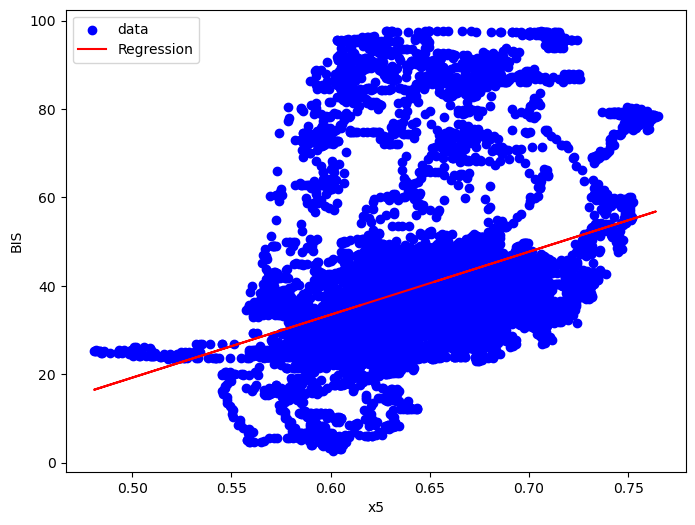

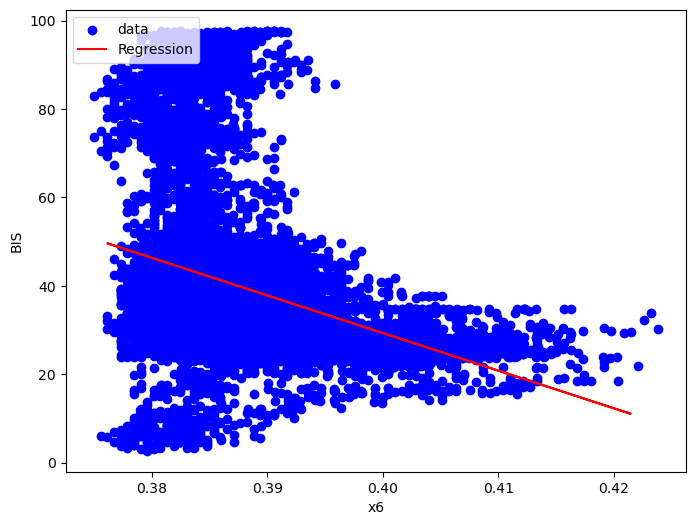

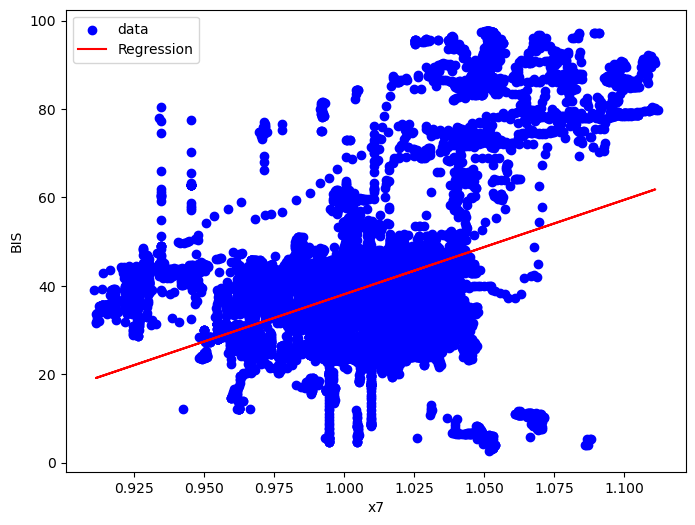

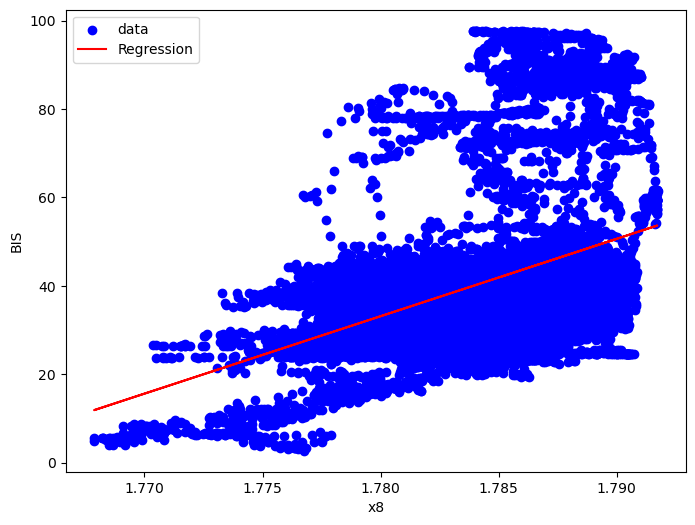

In [17]:
for column in Test.columns:
    if column == "BIS":
        continue
        
    plot_regression(Test, column)
    


In [18]:
# Metrics
pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

,Metrics,Values
0,x1_r2,22.066560
1,x2_r2,55.707819
2,x3_r2,0.026110
3,x4_r2,5.514961
4,x5_r2,13.810597
5,x6_r2,13.037002
6,x7_r2,17.795806
7,x8_r2,16.689244


The Rsquared value showed that x2, x1, x7, x8, x5 and x6 seem to be the better features and are listed in their order of importance from the highest.

Feature 1: 2435.191541
Feature 2: 12727.001044
Feature 3: 1.082730
Feature 4: 608.393131
Feature 5: 1384.157646
Feature 6: 1314.825467
Feature 7: 1860.104414
Feature 8: 2149.347047


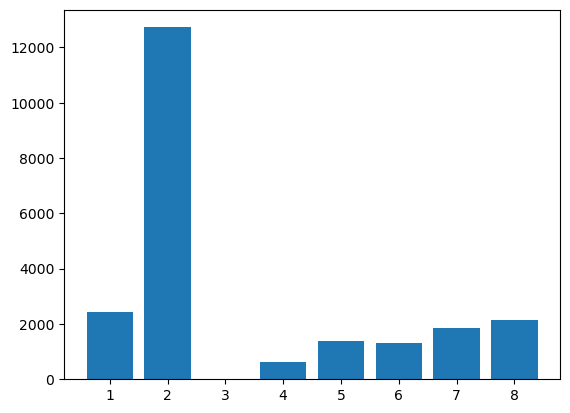

In [19]:

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X = Test.drop('BIS', axis=1)
y = Test['BIS']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i+1, fs.scores_[i]))
# plot the scores
plt.bar([i+1 for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The f-regression showed that x2, x1, x7, x8, x5 and x6 are the better features.

In [23]:
xx=Test.drop('BIS', axis=1)
yy=Test['BIS']

In [24]:
# Rank the 8 features using mRMR
from mrmr import mrmr_regression
selected_features = mrmr_regression(X=xx, y=yy, K=8)

print(selected_features)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.19it/s]

['x2', 'x6', 'x8', 'x1', 'x4', 'x7', 'x5', 'x3']


### Feature selection through random forest

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X=Train.drop('BIS', axis=1)
y= Train['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 8
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


  feature  importance
1      x2    0.606313
4      x5    0.170449
5      x6    0.089378
7      x8    0.064172
6      x7    0.029623
0      x1    0.024073
3      x4    0.014414
2      x3    0.001579
